### update data

每天只用运行一次更新数据

In [ ]:
from utils_update import *
update()

### retrieve corr coff test

In [1]:
%load_ext autoreload
%autoreload 2
from utils import *

In [ ]:
result = calc_pair_trading('SMH', method='rolling')

In [2]:
smh_list = df_code.query("etf_symbol == 'SMH'").symbol.tolist()

In [5]:
data_smh = ol_data.loc[(slice(None), smh_list), :]
# data_smh = data_smh.reset_index()
# data_smh.date = pd.DatetimeIndex(data_smh.date)
# data_smh = data_smh.set_index(['date', 'code'])

In [6]:
data_smh.head()

,,high,open,low,volume,Adj Close
date,code,,,,,
2010-01-04,ADI,25.2996,24.9852,24.8437,2102623.0,24.8909
2010-01-05,ADI,25.0009,24.8909,24.6866,2040046.0,24.8516
2010-01-06,ADI,25.0324,24.9223,24.6315,2104916.0,24.8044
2010-01-07,ADI,24.8752,24.7259,24.4193,2033310.0,24.6080
2010-01-08,ADI,24.7652,24.5215,24.3643,2393062.0,24.7494


In [7]:
close_qfq = data_smh.pivot_table(values=['Adj Close'], index=['date'], columns=['code'])['Adj Close']

In [10]:
corr_matrix = close_qfq['2018-01':'2018-06'].corr()

In [12]:
s = corr_matrix.abs().unstack()
so = s.sort_values(ascending=False, kind="quicksort")
so[:20]

code  code
XLNX  XLNX    1.0
MU    MU      1.0
TER   TER     1.0
SWKS  SWKS    1.0
STM   STM     1.0
QRVO  QRVO    1.0
QCOM  QCOM    1.0
ON    ON      1.0
OLED  OLED    1.0
NXPI  NXPI    1.0
NVDA  NVDA    1.0
MRVL  MRVL    1.0
TXN   TXN     1.0
MCHP  MCHP    1.0
LRCX  LRCX    1.0
KLAC  KLAC    1.0
INTC  INTC    1.0
CDNS  CDNS    1.0
AVGO  AVGO    1.0
ASML  ASML    1.0
dtype: float64

In [18]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [18, 18]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

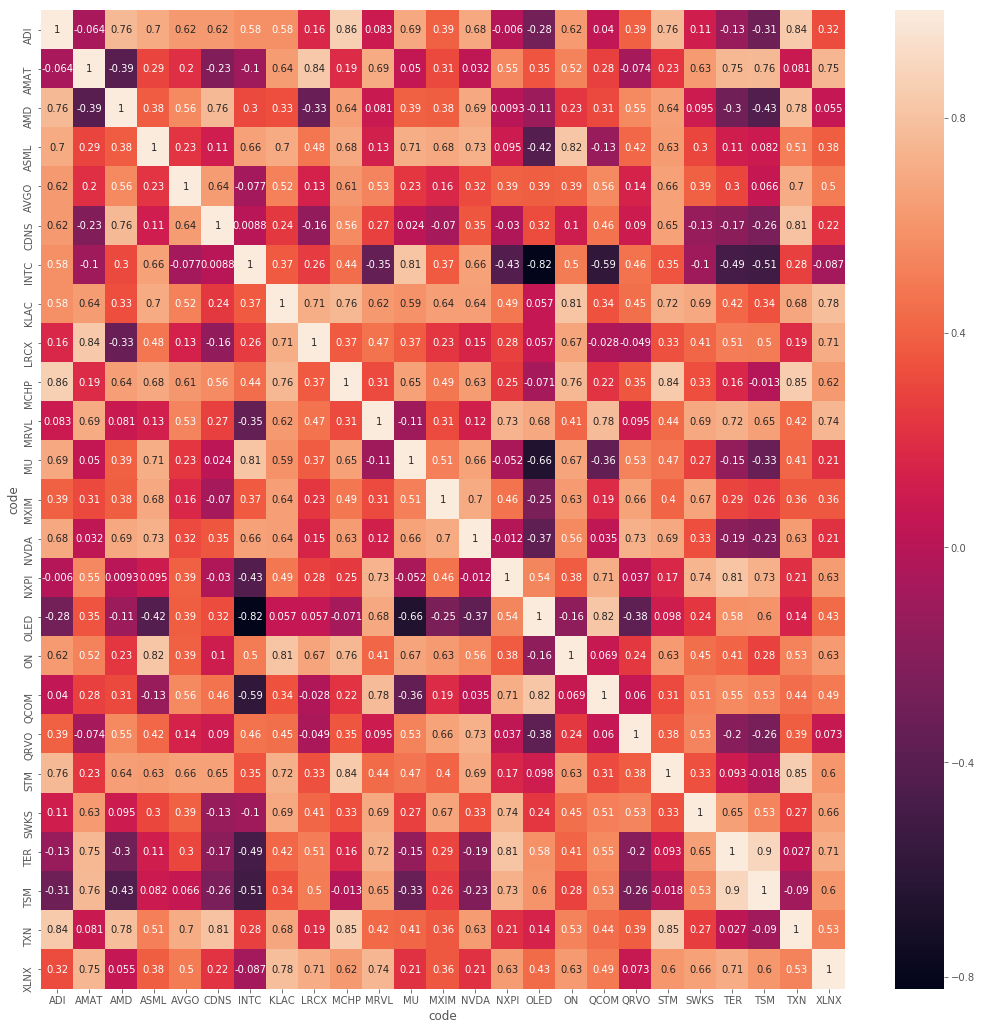

In [19]:

# plot the heatmap
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns,
           annot=True);

In [ ]:
close_qfq.corr()

In [ ]:
data_msft = select_code(ol_data, 'MSFT')

In [ ]:
data_msft.index = pd.DatetimeIndex(data_msft.index)

In [ ]:
data_msft['2018-11':'2018-12']

In [ ]:
with open('data/temp_dataframe', 'rb') as f:
    temp_df = pickle.load(f)

In [ ]:
temp_df.index